In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy import types

Initalizing the databse

In [2]:
csv_file = "Data/traffic_accidents.csv"
db_file = 'traffic_accidents.db'

# Connect to SQLite database
conn = sqlite3.connect(db_file)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)

df_schema = {
'accidents' : "Integer",
'traffic_fine_amount' : "Integer",
'traffic_density' : "Float",
"traffic_lights" : "Float",
 'pavement_quality' : "Float",
 'urban_area' : "Integer", # Boolean
 'average_speed' : "Float",
 'rain_intensity' : "Float",
 'vehicle_count' : "Float",
 'time_of_day' : "Float",
}
# Save the DataFrame to an SQLite table
table_name = 'traffic_accidents_SQL'
df.to_sql(table_name, conn, if_exists='replace', index=False, dtype=df_schema)
print(df.dtypes)
conn.close()


accidents                int64
traffic_fine_amount    float64
traffic_density        float64
traffic_lights         float64
pavement_quality       float64
urban_area               int64
average_speed          float64
rain_intensity         float64
vehicle_count          float64
time_of_day            float64
dtype: object


Accidents vs Time of Day

C:\Users\iannq\AppData\Local\Temp\ipykernel_21372\3093070025.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_period = df.groupby(['urban_area', 'period']).size().reset_index(name='accidents')


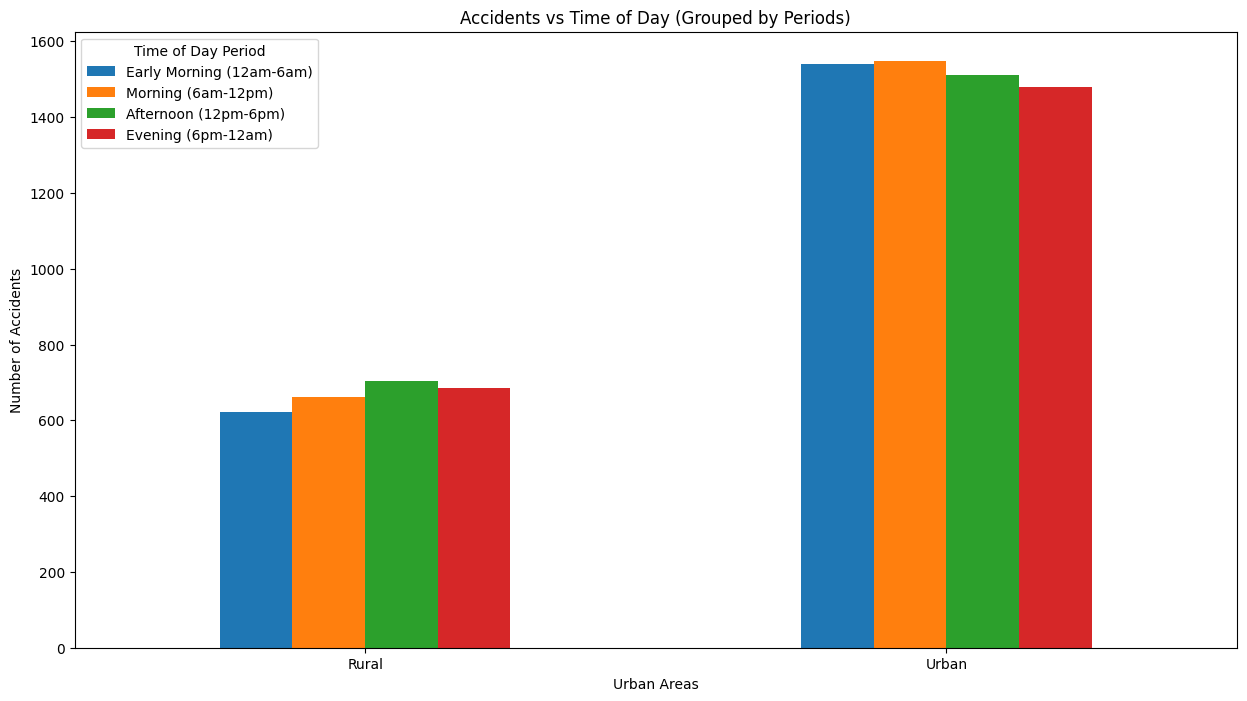

In [3]:
# Convert the float time to hours
df['hour'] = df['time_of_day'].apply(lambda x: int(x))  # Extract the hour part

# Create a new column for time of day periods
def categorize_period(hour):
    if 0 <= hour < 6:
        return 'Early Morning (12am-6am)'
    elif 6 <= hour < 12:
        return 'Morning (6am-12pm)'
    elif 12 <= hour < 18:
        return 'Afternoon (12pm-6pm)'
    else:
        return 'Evening (6pm-12am)'

df['period'] = df['hour'].apply(categorize_period)

# Define the desired order of the periods
period_order = ['Early Morning (12am-6am)', 'Morning (6am-12pm)', 'Afternoon (12pm-6pm)', 'Evening (6pm-12am)']

# Convert 'period' to a categorical type with the specified order
df['period'] = pd.Categorical(df['period'], categories=period_order, ordered=True)

# Group by 'urban_area' and 'period' and count accidents
accidents_per_period = df.groupby(['urban_area', 'period']).size().reset_index(name='accidents')

# Pivot the data to get periods as columns
accidents_pivot = accidents_per_period.pivot(index='urban_area', columns='period', values='accidents').fillna(0)

# Finally, plot the data
accidents_pivot.plot(kind='bar', figsize=(15, 8))
plt.title('Accidents vs Time of Day (Grouped by Periods)')
plt.xlabel('Urban Areas')
plt.ylabel('Number of Accidents')
plt.legend(title='Time of Day Period')
plt.xticks(ticks=[0, 1], labels=['Rural', 'Urban'], rotation=0)
plt.show()


C:\Users\iannq\AppData\Local\Temp\ipykernel_6328\2379056342.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_period = df.groupby(['period']).size().reset_index(name='accidents')


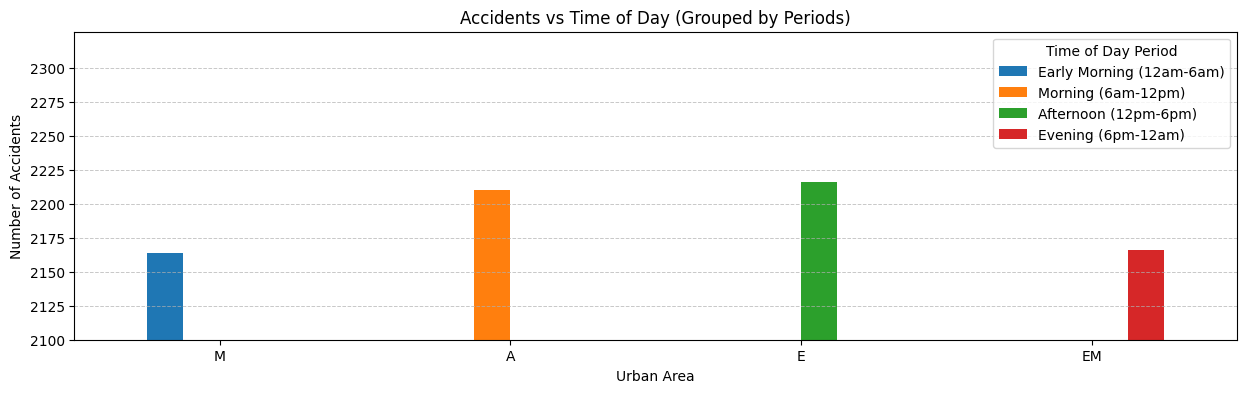

In [75]:
# Convert the float time to hours
df['hour'] = df['time_of_day'].apply(lambda x: int(x))  # Extract the hour part

# Create a new column for time of day periods
def categorize_period(hour):
    if 0 <= hour < 6:
        return 'Early Morning (12am-6am)'
    elif 6 <= hour < 12:
        return 'Morning (6am-12pm)'
    elif 12 <= hour < 18:
        return 'Afternoon (12pm-6pm)'
    else:
        return 'Evening (6pm-12am)'

df['period'] = df['hour'].apply(categorize_period)

# Define the desired order of the periods
period_order = ['Early Morning (12am-6am)', 'Morning (6am-12pm)', 'Afternoon (12pm-6pm)', 'Evening (6pm-12am)']

# Convert 'period' to a categorical type with the specified order
df['period'] = pd.Categorical(df['period'], categories=period_order, ordered=True)

# Group by 'period' and count accidents
accidents_per_period = df.groupby(['period']).size().reset_index(name='accidents')

# Pivot the data to get periods as columns
accidents_pivot = accidents_per_period.pivot(columns='period', values='accidents').fillna(0)

# Finally, plot the data
ax = accidents_pivot.plot(kind='bar', figsize=(15, 4))
plt.title('Accidents vs Time of Day (Grouped by Periods)')
plt.xlabel('Urban Area')
plt.ylabel('Number of Accidents')
plt.yticks(range(2000, int(accidents_pivot.max().max()) + 100, 25))
plt.ylim(bottom=2100)
plt.legend(title='Time of Day Period')

ax.set_xticklabels(["M", "A", "E", "EM"], rotation=0, ha='center')

plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()
